## **Exploratory Data Analysis**

- 1- DataFrame.
- 2- Correlación entre variables.
- 3- Cantidad de restaurantes mexicanos por trimestre por año. 
- 4- Cantidad de restaurantes mexicanos por estado.
- 5- Cantidad de restaurantes mexicanos por empresa.
- 6- Evolución de la cantidad de restaurantes mexicanos por empresa por trimestre por año.
- 7- Cantidad de restaurantes mexicanos por empresa por estado.
- 8- Calificación de los restaurantes mexicanos.
- 9- Nube de palabras de las reseñas de los clientes.
- Glosario

### <font color="#ff5653"> 1- Dataframe </font>

In [17]:
# Libreria
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Dataframe
yelp=pd.read_csv("ETL_YELP_todos_estados.csv")

In [ ]:
# Columnas y tipos de datos del dataframe
yelp.info()

In [4]:
# Convertimos el tipo de dato de la columna "Date" a formato datetime.
# Para poder copiar las fechas de la columna.
yelp["Date"] = pd.to_datetime(yelp["Date"])

In [5]:
# Vemos la última fecha de carga de datos.
ultima_fecha = yelp["Date"].max()
print(f"La última fecha de carga de datos en la columna Date es: {ultima_fecha}")


La última fecha de carga de datos en la columna Date es: 2022-01-19 00:00:00


In [6]:
# Vemos la primera fecha de carga de datos.
ultima_fecha = yelp["Date"].min()
print(f"La primera fecha de carga de datos en la columna Date es: {ultima_fecha}")

La primera fecha de carga de datos en la columna Date es: 2019-01-01 00:00:00


- Eliminamos los datos cargados el año 2022 por no ser representativo si tomamos el primer trimestre. Solo tiene datos cargados hasta el 19 de enero. 

In [7]:
# Selecciona las filas que cumplen con la condición 2022
filas_a_eliminar = yelp.loc[yelp["Date"].dt.year == 2022].index

In [8]:
# Elimina las filas seleccionadas
yelp.drop(filas_a_eliminar, inplace=True)

In [9]:
# Vemos la última fecha de carga de datos para comprobar que se elimino el año 2022.
ultima_fecha = yelp["Date"].max()
print(f"La última fecha de carga de datos en la columna Date es: {ultima_fecha}")

La última fecha de carga de datos en la columna Date es: 2021-12-31 00:00:00


In [10]:
# Creamos una nueva columna "YearQuarter" con los años y trimestres extraídos de la columna "Date".
yelp["YearQuarter"] = yelp["Date"].dt.to_period("Q")

In [ ]:
# Nulos del dataframe
yelp.isnull().sum()

In [16]:
# Contenido del dataframe
yelp.head(5)

,Business_id,Name,Categories,Stars,Text,Useful,Funny,Cool,Date,User_id,City,State,Latitude,Longitude,Address,YearQuarter
0,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,Hands down best Mexican in Indy! This place al...,0,0,0,2019-03-21,4K_WOyp5edBa9-JtMjxiwQ,Indianapolis,IN,39.824485,-86.270933,3818 N Highschool Rd,2019Q1
1,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,After reading all the reviews & hearing great ...,1,0,1,2019-04-20,opsegPYOBbMrULOm7QpkJw,Indianapolis,IN,39.824485,-86.270933,3818 N Highschool Rd,2019Q2
2,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",4.0,"First time here, had decent reviews so I wante...",2,0,0,2019-02-08,da1by_dHiaH7WziqVjCnAQ,Indianapolis,IN,39.824485,-86.270933,3818 N Highschool Rd,2019Q1
3,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",4.0,Service was fast! Got the cabeza taco and it w...,1,0,1,2019-07-02,3YdsWEXfse4AymDuTDoQpQ,Indianapolis,IN,39.824485,-86.270933,3818 N Highschool Rd,2019Q3
4,yS0TsUzKBQlHQCZZeBrxww,Tortas El Guero,"Mexican, Sandwiches, Restaurants",5.0,"Man, was I blown away!\n\nWas looking for a de...",2,0,0,2019-04-05,4ynHzlHrlJmK3zBhi9FL6A,Indianapolis,IN,39.824485,-86.270933,3818 N Highschool Rd,2019Q2


### <font color="#ff5653"> 2- Correlación entre variables </font>

In [13]:
# Nuevo dataframe para trabajar
yelp_2 = yelp.copy()

In [ ]:
yelp_2.info()

In [14]:
# Seleccionamos solo las columnas numéricas
columnas_x = yelp_2.select_dtypes(include=["float64", "int64", "datetime64"])

C:\Users\hpiza\AppData\Local\Temp\ipykernel_12632\2397692926.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(columnas_x.corr(), annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)


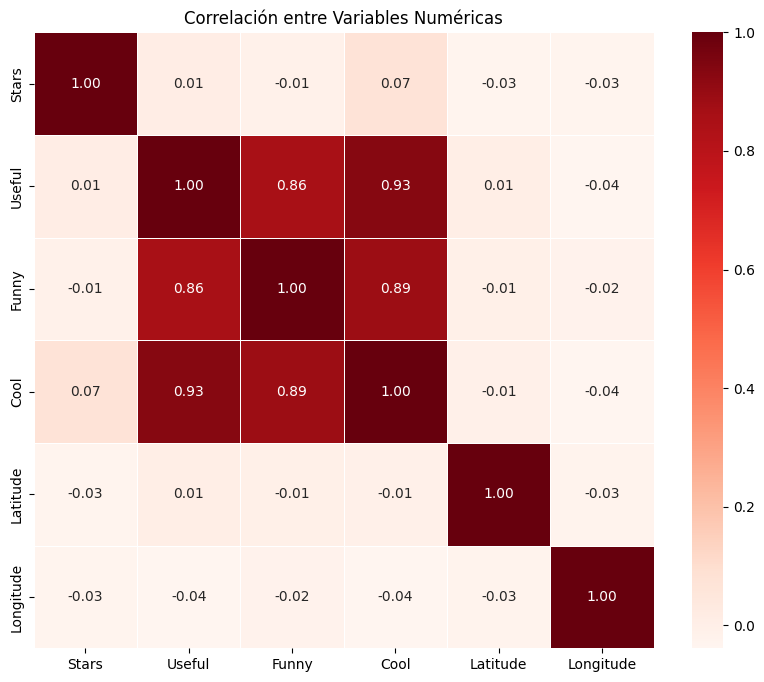

In [15]:
# Visualizamos la correlación entre variables numéricas
plt.figure(figsize=(10, 8))

sns.heatmap(columnas_x.corr(), annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre Variables Numéricas")

plt.show()

**Análisis**

La correlacion entre variables se debe a que cuando se realiza valoración de un restaurante los campos **Useful, Funny y Cool** se completan por igual y tienen como significado global si es buena o mala la calificación.

Correlaciones entre variable:
  - Useful-Funny = 0.88
  - Useful-Cool = 0.99
  - Funny-Cool = 0.91

Diccionario:
  - Useful => números de votos como reseña útil (valores enteros).
  - Funny => número de votos como reseña graciosa (valores enteros).
  - Cool => número de votos como reseña cool (valores enteros).

### <font color="#ff5653">3- Cantidad de restaurantes mexicanos por trimestre por año. </font>

In [18]:
# Nuevo dataframe para trabajar
yelp_3 = yelp.copy()

In [19]:
# Seleccionamos las columnas "Business_id" y "YearQuarter"
# "Business_id" tiene la identificacion de cada restaurante.
business_quarter = yelp_3[["Business_id", "YearQuarter"]]

In [20]:
# Eliminamos las filas duplicadas
# Para evitar contar el mismo restaurante varias veces en cada trimestre por año.
business_quarter = business_quarter.drop_duplicates()

In [21]:
# Agrupamos los datos por "YearQuarter"-"Business_id", contamos la cantidad de restaurantes por trimestre por año.
business_quarter = business_quarter.groupby(["YearQuarter", "Business_id"]).size().reset_index(name="counts")

In [22]:
# Sumamos las ocurrencias de cada business_id por trimestre
business_quarter = business_quarter.groupby(["YearQuarter"])["counts"].sum().reset_index(name="total")

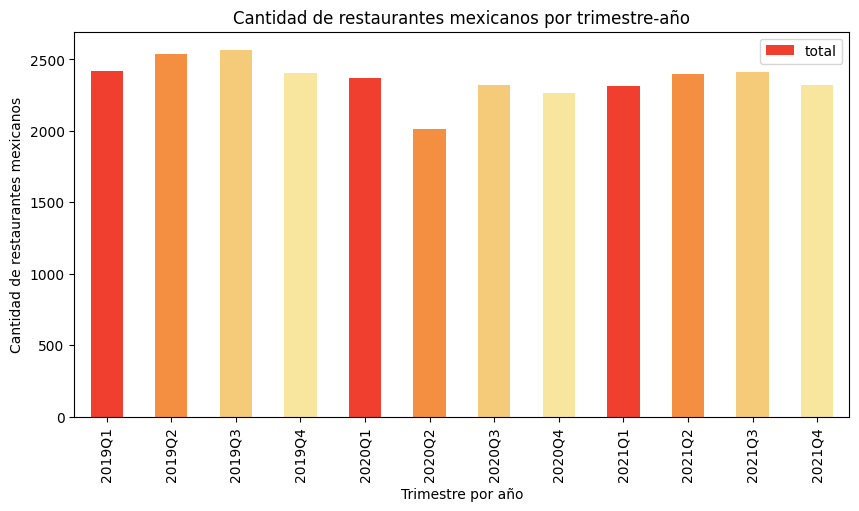

In [24]:
# Graficamos los datos
business_quarter.plot(kind="bar", x="YearQuarter", y="total", color=["#f03f2e","#f48f41","#f5cb79", "#f8e59e"], figsize=(10, 5))

# Etiquetas: Titulo y ejes
plt.title("Cantidad de restaurantes mexicanos por trimestre-año")
plt.xlabel("Trimestre por año")
plt.ylabel("Cantidad de restaurantes mexicanos")

# Muestramos el gráfico.
plt.show()

Análisis:
    
- Muestra un patrón que la cantidad de restaurantes mexicanos es menor en el primer trimestre y cuarto trimestre de cada año y es mayor en el segundo y tercer trimestre de cada año.

- La exepción seria el segundo trimestre del año 2020 que dismunuye significativamente la cantidad de restaurantes con respecto al resto de los trimestre. Esto puede estar dado debido al inicio de la pandemia en marzo del 2020.

- En el siguiente trimestre del año 2020 (tercer trimestre) se reestablece la cantidad de restaurantes similar al resto de los año. Esto puede estar dado debido a la adopción de delivery por parte de la mayoria de los restaurantes que permitio seguir trabajando. 

### <font color="#ff5653"> 4- Cantidad de restaurantes mexicanos por estado. </font>

In [25]:
# Nuevo dataframe para trabajar
yelp_4 = yelp.copy()

In [ ]:
yelp_4.info()

In [27]:
# Selecciona las columnas "Business_id", "State" y "YearQuarter"
# "State" estan cada estado de EE.UU. donde hay restaurantes mexicanos.
business_state_trimestre = yelp_4[["Business_id", "State", "YearQuarter"]]

In [28]:
# Nos qudamos con la información solo del ultimo trimestre analizado (cuarto trimestre del año 2021)
business_state_trimestre = business_state_trimestre[(yelp_4["YearQuarter"] == "2021Q4")]

In [29]:
# Elimina las filas duplicadas
# Para no contar el mismo restaurante mas de una ves en cada estado.
business_state_trimestre = business_state_trimestre.drop_duplicates()

In [30]:
# Suma las ocurrencias de cada business_id por estado
business_state_trimestre = business_state_trimestre.groupby("State")["Business_id"].count()

In [31]:
# Restaurantes mexicanos por estado para el cuarto trimestre del año 2021
business_state_trimestre.head(15)

State
AZ    281
CA     95
DE     33
FL    369
ID     88
IL     42
IN    266
LA    106
MO    178
NJ     84
NV    174
PA    345
TN    263
Name: Business_id, dtype: int64

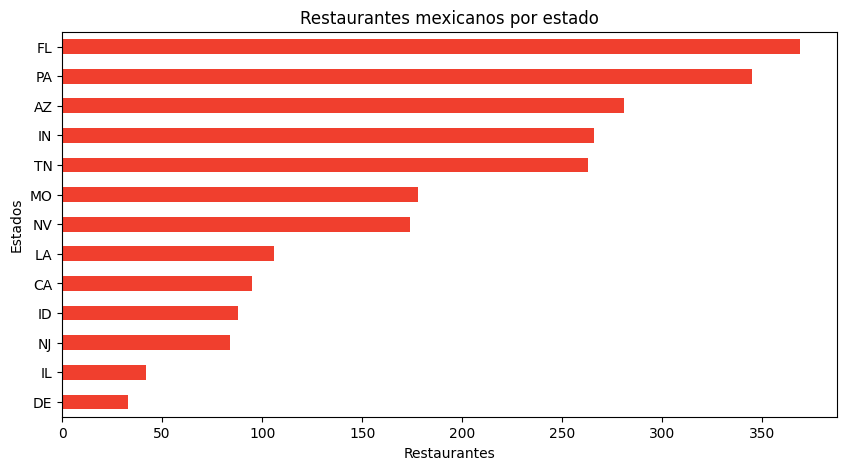

In [32]:
# Código para ordenar los datos por "Número de negocios"
business_state = business_state_trimestre.sort_values(ascending=True)

# Código para graficar los datos ordenados
business_state.plot(kind="barh", x="Estados", y="Número de negocios", color=["#f03f2e" ], figsize=(10, 5))

# Etiquetas: Titúlo y ejes
plt.title("Restaurantes mexicanos por estado")
plt.xlabel("Restaurantes")
plt.ylabel("Estados")

# Muestramos el gráfico.
plt.show()

### <font color="#ff5653"> 5- Cantidad de restaurantes mexicanos por empresa. </font>

In [33]:
# Nuevo dataframe para trabajar
yelp_5 = yelp.copy()

In [34]:
# Selecciona las columnas "Business_id", "Name" y "YearQuarter"
business_name_trimestre = yelp_5[["Business_id", "Name", "YearQuarter"]]

In [35]:
# Nos qudamos con la información solo del ultimo trimestre analizado (cuarto trimestre del año 2021)
business_name_trimestre = business_name_trimestre[(yelp_5["YearQuarter"] == "2021Q4")]

In [36]:
# Elimina las filas duplicadas
business_name_trimestre = business_name_trimestre.drop_duplicates()

In [37]:
# Suma las ocurrencias de cada business_id por Nombre
business_name_trimestre = business_name_trimestre.groupby("Name")["Business_id"].count()

In [38]:
# Ordenamos de manera descendente 
business_name_trimestre = business_name_trimestre.sort_values(ascending=False)

In [39]:
business_name_trimestre.head(25) 

Name
Taco Bell                                190
Chipotle Mexican Grill                   120
Chili's                                   57
Jack in the Box                           56
QDOBA Mexican Eats                        41
Tijuana Flats                             16
Moe's Southwest Grill                     16
Taco Bus                                   9
Del Taco                                   8
Los Betos                                  8
Fuzzy's Taco Shop                          7
Viva Burrito                               6
On The Border Mexican Grill & Cantina      6
El Pollo Loco                              6
Chuy's                                     6
La Hacienda                                6
Lolis Mexican Cravings                     6
Grand Hacienda                             5
Margaritas Mexican Restaurant              5
Oscar's Taco Shop                          5
Carl's Jr                                  5
Las Palmas Mexican Restaurant              5
Calif

In [40]:
# Cantidad de restaurantes mexicanos
business_name_trimestre.sum()

2324

- Top 25 de restaurantes mexicanos

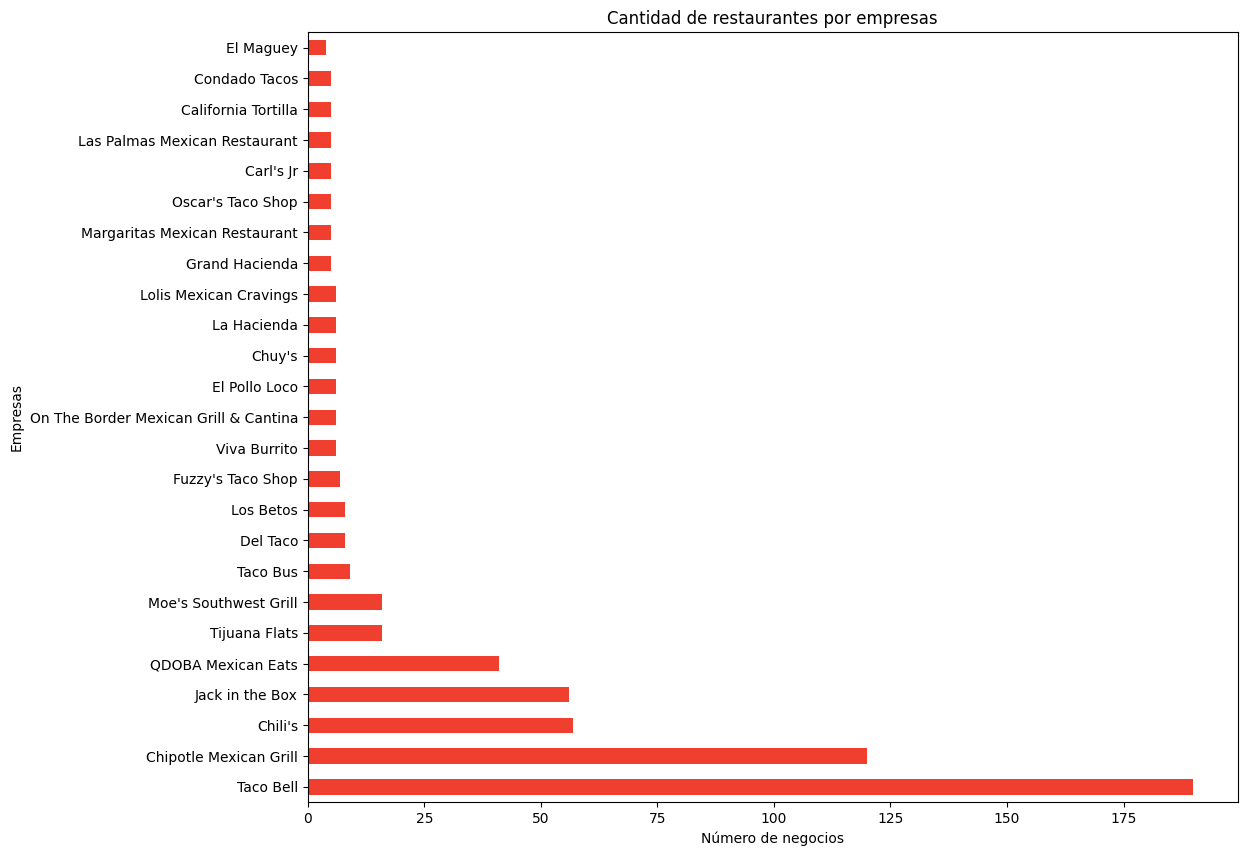

In [41]:
# Seleccionar los 20 valores más grandes de la columna "Name"
top_25 = business_name_trimestre.nlargest(25, keep="first")

# Graficar las empresas y la cantidad de restaurantes mexicanos por empresa.
plt.figure(figsize=(12, 10))
top_25.plot(kind="barh", color="#f03f2e")
plt.title("Cantidad de restaurantes por empresas")
plt.xlabel("Número de negocios")
plt.ylabel("Empresas")
plt.show()

- Top 7 de restaurantes mexicanos

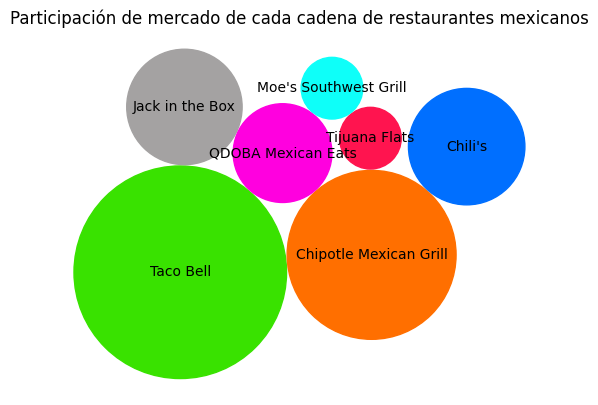

In [42]:
browser_market_share = {
    "browsers": ["Taco Bell", "Chipotle Mexican Grill", "Chili's", "Jack in the Box", "QDOBA Mexican Eats", "Tijuana Flats", "Moe's Southwest Grill"],
    "market_share": [190, 120, 57, 56, 41, 16, 16],
    "color": ["#39e200", "#ff6f00", "#006fff", "#a4a2a2", "#ff00df", "#ff144f", "#0efff9",]
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment="center", verticalalignment="center")


bubble_chart = BubbleChart(area=browser_market_share["market_share"],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, browser_market_share["browsers"], browser_market_share["color"])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title("Participación de mercado de cada cadena de restaurantes mexicanos")

plt.show()

### <font color="#ff5653"> 6- Evolución de la cantidad de restaurantes mexicanos por empresa por trimestre por año.</font>

In [43]:
# Nuevo dataframe para trabajar
yelp_6 = yelp.copy()

In [44]:
# Creamos la variable con las 7 empresas de restaurantes mexicanos mas grandes.
top_7 = ["Taco Bell", "Chipotle Mexican Grill", "Chili's", "Jack in the Box", "QDOBA Mexican Eats", "Tijuana Flats", "Moe's Southwest Grill"]

In [45]:
# Filtramos el dataframe por las 7 empresas de restaurantes
yelp6_top7 = yelp_6[(yelp_6["Name"].isin(top_7))]

In [ ]:
# Vemos las columnas y filas
yelp6_top7.head(5)

In [ ]:
# Convertimos el tipo de dato de "YearQuarter" a string
yelp6_top7["YearQuarter"] = yelp6_top7["YearQuarter"].astype(str)

In [48]:
# Agrupamos por "YearQuarter" y "Name" y contamos los "Business_id" únicos
# Para obtener la cantidad de negocios por marca por trimestre
restaurantes_por_trimestre = yelp6_top7.groupby(["YearQuarter", "Name"])["Business_id"].nunique()

In [ ]:
restaurantes_por_trimestre

In [49]:
# Desapilamos el multi-índice para que "Name" sea una columna y no un índice
restaurantes_por_trimestre = restaurantes_por_trimestre.reset_index()

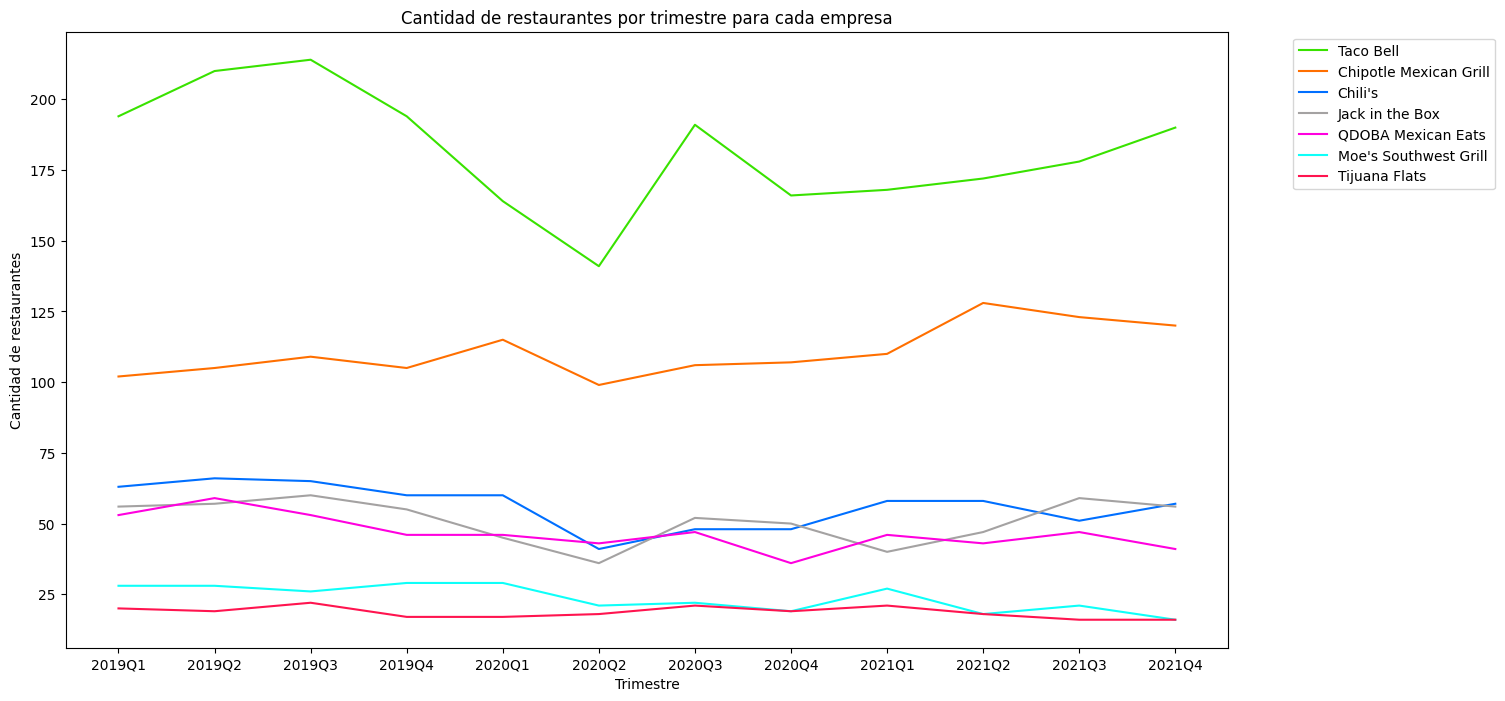

In [50]:
# Creamos el gráfico
plt.figure(figsize=(15,8))
colores = ["#006fff", "#ff6f00", "#a4a2a2", "#0efff9", "#ff00df", "#39e200", "#ff144f"]  
lines = []  # Aquí guardaremos las líneas para la leyenda
labels = []  # Aquí guardaremos las etiquetas para la leyenda

for i, name in enumerate(restaurantes_por_trimestre["Name"].unique()):
    data = restaurantes_por_trimestre[restaurantes_por_trimestre["Name"] == name]
    line, = plt.plot(data["YearQuarter"], data["Business_id"], color=colores[i % len(colores)])
    lines.append(line)
    labels.append(name)

# Ordenamos las leyendas de mayor a menor
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[1].get_ydata()[-1], reverse=True))

plt.xlabel("Trimestre")
plt.ylabel("Cantidad de restaurantes")
plt.title("Cantidad de restaurantes por trimestre para cada empresa")
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Análisis:
- La empresas se mantienen constantes en la cantidad de sucursales, a excepción de la empresa Chipotle Mexican Grill que en el periodo análizado tiene una tendencia a crecer.

Media de la cantidad de restaurantes mexicanos por empresa por trimestre por año.

In [85]:
restaurantes_por_trimestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YearQuarter  84 non-null     object
 1   Name         84 non-null     object
 2   Business_id  84 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [88]:
restaurantes_por_trimestre.head(3)

,YearQuarter,Name,Business_id
0,2019Q1,Chili's,63
1,2019Q1,Chipotle Mexican Grill,102
2,2019Q1,Jack in the Box,56


In [89]:
# Calculamos la media para cada empresa y el desvio estandar total.
restaurantes_crecimiento_x = restaurantes_por_trimestre.groupby(["Name"]).agg({"Business_id": ["mean", "std"]})

In [90]:
restaurantes_crecimiento_x

Business_id           
                              mean        std
Name                                         
Chili's                  56.250000   7.676706
Chipotle Mexican Grill  110.750000   8.904800
Jack in the Box          51.083333   7.668807
Moe's Southwest Grill    23.666667   4.677477
QDOBA Mexican Eats       46.666667   6.080271
Taco Bell               181.833333  20.919036
Tijuana Flats            18.666667   2.015095

In [91]:
# Ordenamos de mayor media a menor.
df_mean_sorted = restaurantes_crecimiento_x.sort_values(by=("Business_id", "mean"), ascending=False)

In [73]:
df_mean_sorted

Business_id           
                              mean        std
Name                                         
Taco Bell               181.833333  20.919036
Chipotle Mexican Grill  110.750000   8.904800
Chili's                  56.250000   7.676706
Jack in the Box          51.083333   7.668807
QDOBA Mexican Eats       46.666667   6.080271
Moe's Southwest Grill    23.666667   4.677477
Tijuana Flats            18.666667   2.015095

Análisis:
- Para cada trimestre análizado, la media muestra la cantidad promedio de sucursales abiertas por empresa con una variacion de cierre o apertura de sucursales dado por el desvio estandar.

### <font color="#ff5653"> 7- Cantidad de restaurantes mexicanos por empresa por estado. </font>

In [ ]:
yelp6_top7.head(2)

In [52]:
yelp6_top7_filtrado = yelp6_top7.loc[yelp6_top7['YearQuarter'] == '2021Q4']

In [ ]:
yelp6_top7_filtrado

In [54]:
# Agrupamos por "State" y "Name" y contamos los "Business_id" únicos
# Para obtener la cantidad de negocios por marca por estado.
restaurantes_por_estado = yelp6_top7_filtrado.groupby(["State", "Name"])["Business_id"].nunique()

In [ ]:
restaurantes_por_estado

In [55]:
# Desapilamos el multi-índice para que "Name" sea una columna y no un índice
restaurantes_por_estado = restaurantes_por_estado.reset_index()

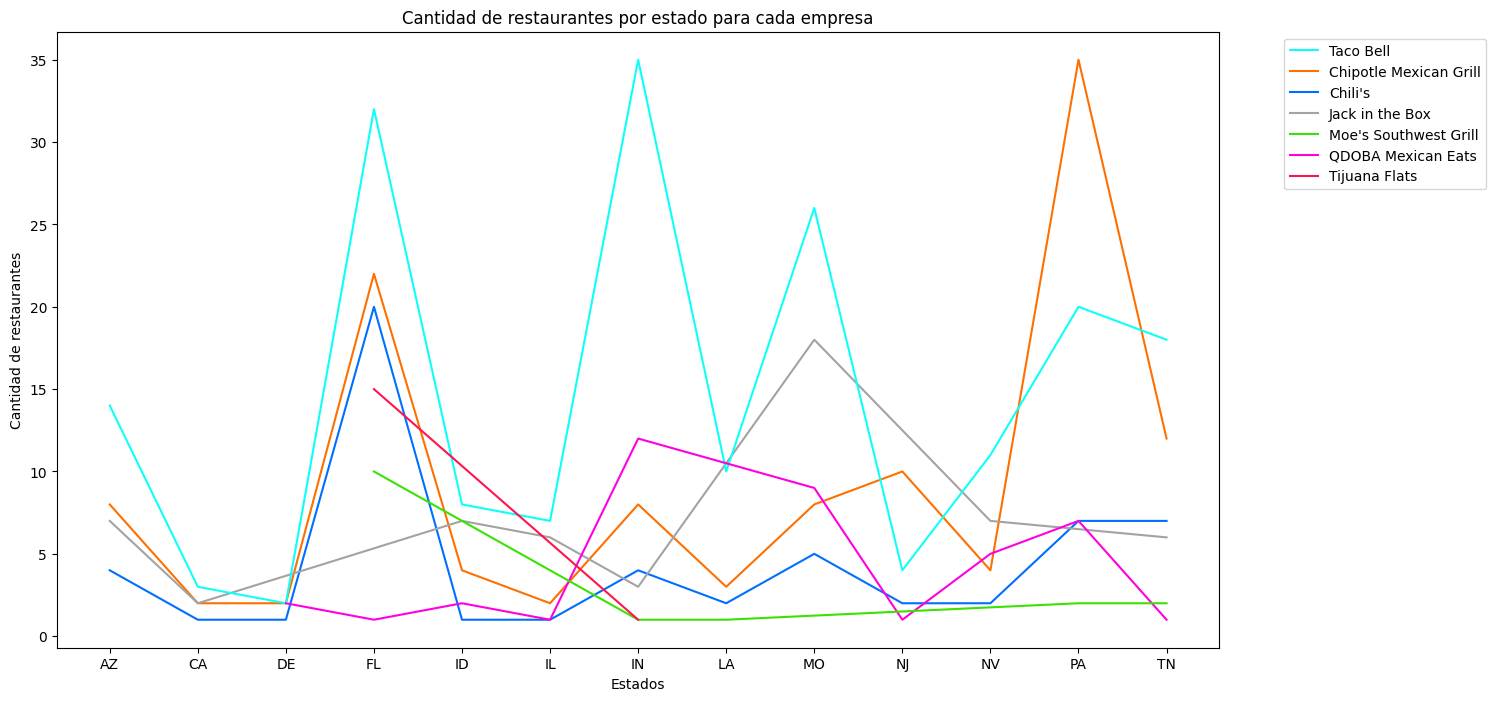

In [56]:
# Creamos el gráfico
plt.figure(figsize=(15,8))
colores = ["#006fff", "#ff6f00", "#a4a2a2", "#0efff9", "#ff00df", "#39e200", "#ff144f"]  
lines = []  # Aquí guardaremos las líneas para la leyenda
labels = []  # Aquí guardaremos las etiquetas para la leyenda

for i, name in enumerate(restaurantes_por_estado["Name"].unique()):
    data = restaurantes_por_estado[restaurantes_por_estado["Name"] == name]
    line, = plt.plot(data["State"], data["Business_id"], color=colores[i % len(colores)])
    lines.append(line)
    labels.append(name)

# Ordenamos las leyendas de mayor a menor
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[1].get_ydata()[-1], reverse=True))

plt.xlabel("Estados")
plt.ylabel("Cantidad de restaurantes")
plt.title("Cantidad de restaurantes por estado para cada empresa")
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Análisis:
- Vemos que Taco Bell es la que tiene mayor de cantidad de restaurantes en cada estado a excepción de cuatro estados (DE, ID, NJ, PA).
- Chipotle Mexican Grill, es la segunda cadena que mas restaurante tiene pero en un solo estado (PA) esta como primera en cantidad de restaurantes.
- Una de las empresas con menor cantidad de sucursales como Tijuana Flats esta primera en cantidad de restaurantes en un solo estado (ID).

In [27]:
# Vemos la distribucion de la cantidad de sucursales por estados.
yelp6_top7x = yelp6_top7.copy()

In [28]:
# Filtramos para obtener el primer trimestre del 2019
yelp6_top7_filtrado_2019q1 = yelp6_top7x.loc[yelp6_top7x["YearQuarter"] == "2019Q1"]

In [29]:
restaurantes_por_estado_2019q1 = yelp6_top7_filtrado_2019q1.groupby(["State", "Name"])["Business_id"].nunique()

In [30]:

restaurantes_por_estado_2019q1 = restaurantes_por_estado_2019q1.reset_index()

In [41]:
# Con este codigo veo el grafico por empresa para cada estado.
# restaurantes_por_estado_2019q1x=restaurantes_por_estado_2019q1[restaurantes_por_estado_2019q1["Name"] == "Chipotle Mexican Grill"]

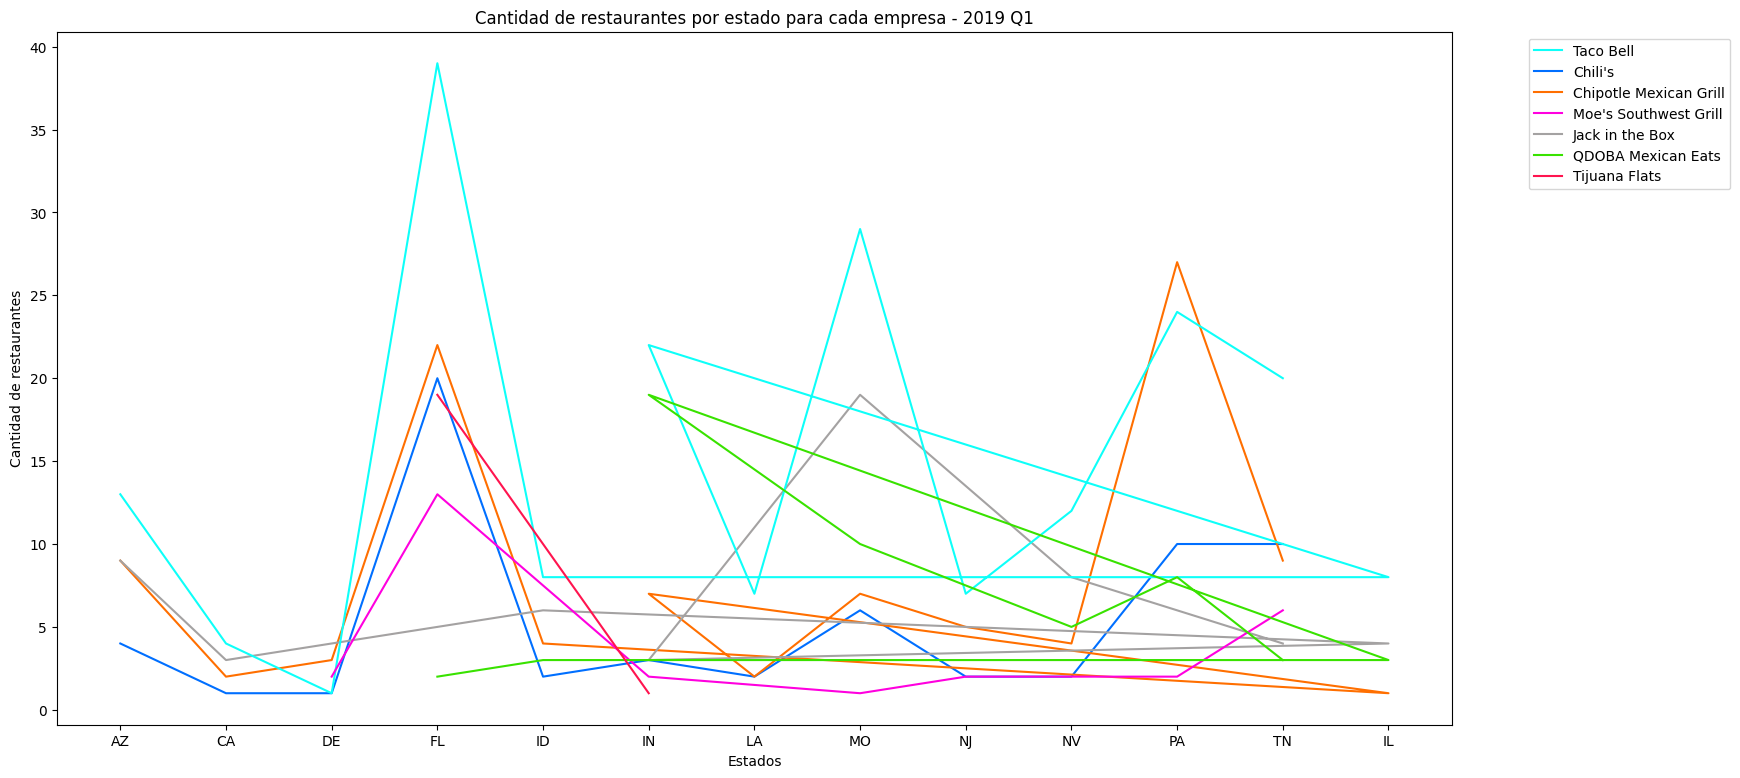

In [43]:
# Creamos el gráfico
# Grafica todo sin sentido, pero no se encontro el problema de esto.

plt.figure(figsize=(18,9))
colores = ["#006fff", "#ff6f00", "#a4a2a2", "#0efff9", "#ff00df", "#39e200", "#ff144f"]  
lines = []  # Aquí guardaremos las líneas para la leyenda
labels = []  # Aquí guardaremos las etiquetas para la leyenda

for i, name in enumerate(restaurantes_por_estado_2019q1["Name"].unique()):
    data = restaurantes_por_estado_2019q1[restaurantes_por_estado_2019q1["Name"] == name]
    line, = plt.plot(data["State"], data["Business_id"], color=colores[i % len(colores)])
    lines.append(line)
    labels.append(name)

# Ordenamos las leyendas de mayor a menor
labels, lines = zip(*sorted(zip(labels, lines), key=lambda t: t[1].get_ydata()[-1], reverse=True))

plt.xlabel("Estados")
plt.ylabel("Cantidad de restaurantes")
plt.title("Cantidad de restaurantes por estado para cada empresa - 2019 Q1")
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### <font color="#ff5653"> 8- Calificación de los restaurantes mexicanos. </font>

In [57]:
# Nuevo dataframe para trabajar
yelp_7 = yelp.copy()

In [ ]:
yelp_7.head(2)

In [59]:
# Agrupamos por "Stars" y "Name" y contamos los "Business_id" únicos
# Para obtener la cantidad de negocios por calificacion (1 al 5)
stars_name = yelp_7.groupby(["Stars", "Name"])["Business_id"].nunique()

In [60]:
# Desapilamos el multi-índice para que "Name" sea una columna y no un índice
stars_name = stars_name.reset_index()

In [ ]:
stars_name

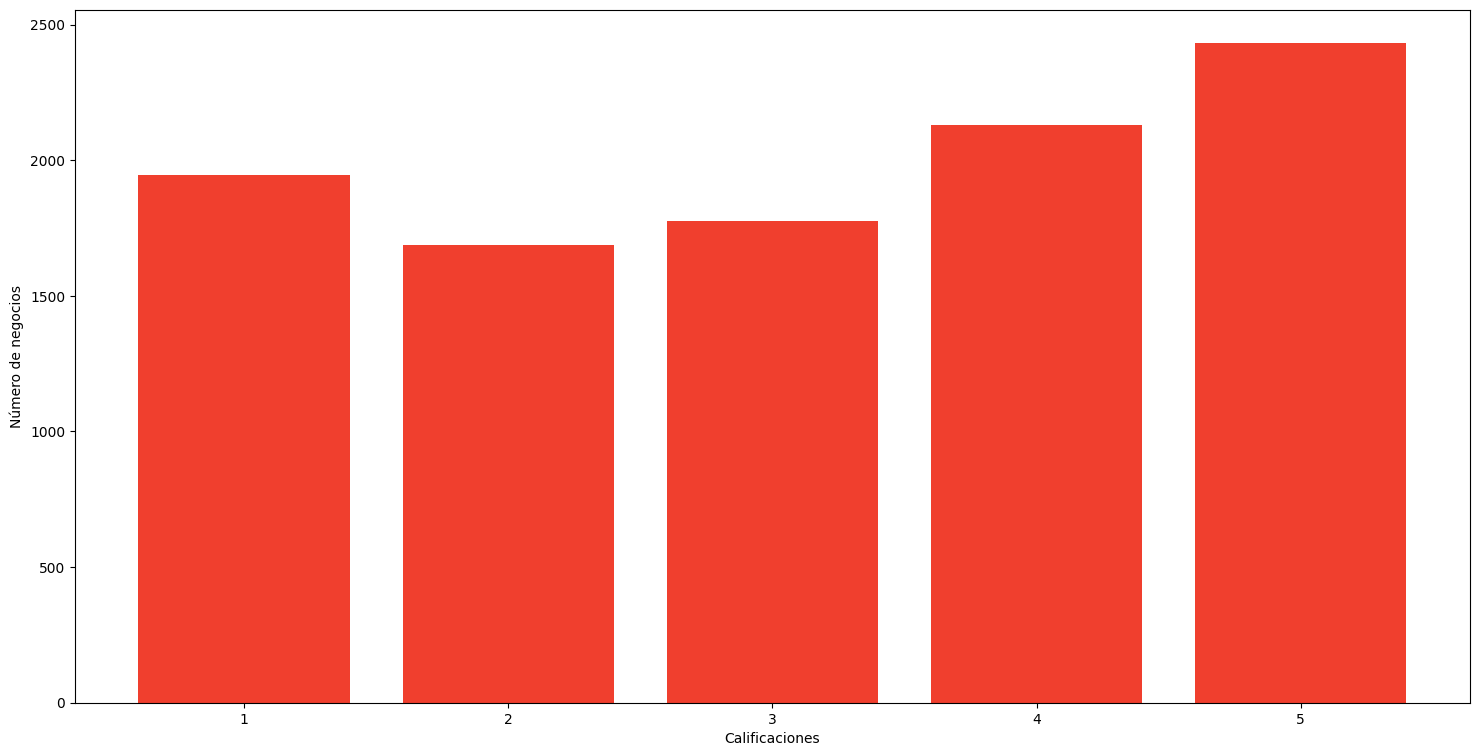

In [62]:
# Agrupamos el DataFrame por "Stars" y contamos la cantidad de negocios para cada calificación
star_counts = stars_name["Stars"].value_counts()

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots(figsize=(18,9))


# Crear un gráfico de barras con las calificaciones en el eje x y la cantidad de negocios en el eje y
ax.bar(star_counts.index, star_counts.values, color="#f03f2e")

# Etiquetas de los ejes
ax.set_xlabel("Calificaciones")
ax.set_ylabel("Número de negocios")

plt.show()

Análisis:
- Se muestra la cantidad de negocios que hay para cada calificación del 1 al 5. Si tomamos a la calificación 3 como neutral, vemos que hay mas calificaciones positivas que negativas.

### <font color="#ff5653"> 9- Nube de palabras de las reseñas de los clientes. </font>

In [63]:
# Nuevo dataframe para trabajar
yelp_8 = yelp.copy()

In [64]:
# Extraemos del dataframe la columna "Text"
text = yelp_8["Text"]

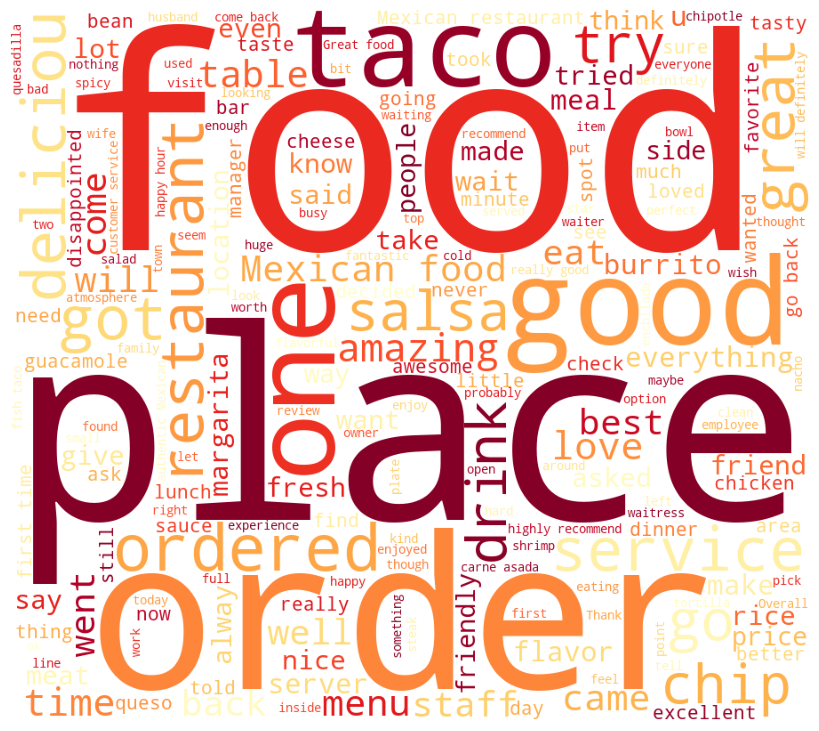

In [70]:
# Creamos la nube de palabras
wordcloud = WordCloud(width = 900, height = 800, background_color ="white", colormap = "YlOrRd", stopwords = None, min_font_size = 10).generate(' '.join(text))

# Mostramos la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Las palabras que mas se repiten en las reseñas de los clientes son:

- Place     >>> Lugar
- Food      >>> Alimento
- Good      >>> Bien
- Order     >>> Orden
- Taco      >>> Taco (Plato mexicano)
- Deliciou  >>> Delicioso
- Service   >>> Servicio
- One       >>> Uno
- Ordered   >>> Ordenado
- Love      >>> Amor

### <font color="#ff5653"> Glosario </font>

In [76]:
claves_estados = pd.read_csv("Estados.csv", sep=";")

In [77]:
claves_estados.head(10)

,NombreEstado,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Carolina del Norte,NC
6,Carolina del Sur,SC
7,Colorado,CO
8,Connecticut,CT
9,Dakota del Norte,ND


In [78]:
# Creamos la variable con los  eestados donde hay restaurantes mexicanos mas grandes.
estados = ["AZ", "CA", "DE", "FL", "ID", "IL", "IN", "LA", "MO", "NJ", "NV", "PA", "TN"]

In [79]:
# Filtra los estados que se encuentran en la lista
estados_claves_xx = claves_estados[claves_estados["State"].isin(estados)]

In [80]:
# Se muestran las claves y los nombres de los estados.
estados_claves_xx

,NombreEstado,State
2,Arizona,AZ
4,California,CA
11,Delaware,DE
13,Florida,FL
19,Idaho,ID
20,Illinois,IL
21,Indiana,IN
25,Luisiana,LA
32,Missouri,MO
35,Nevada,NV
